In [195]:
import numpy as  np
import matplotlib.pyplot as plt
import itertools

plt.rcParams['figure.figsize'] = (8.0, 8.0)
plt.rcParams.update({'font.size': 12})

import warnings; warnings.simplefilter('ignore')

from sklearn.model_selection import StratifiedKFold
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression as LR
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.metrics import classification_report, confusion_matrix

import mne
from mne.preprocessing import Xdawn
from mne.decoding import Vectorizer
from mne.viz import tight_layout

In [175]:
filename="/Volumes/flashDrive/data/Ex10_Suj1_Run1-epo.fif"
epoch1 = mne.read_epochs(filename)

Reading /Volumes/flashDrive/data/Ex10_Suj1_Run1-epo.fif ...
Isotrak not found
    Read a total of 1 projection items:
        Average EEG reference (1 x 61) active
    Found the data of interest:
        t =       0.00 ...    1400.00 ms
        0 CTF compensation matrices available
280 matching events found
Created an SSP operator (subspace dimension = 1)
280 matching events found
Created an SSP operator (subspace dimension = 1)
1 projection items activated


In [176]:
#epoch1.plot(n_channels=10,n_epochs=5)

In [177]:
#epoch1.proj

In [178]:
epoch1.event_id

{u'after': 20, u'before': 10, u'new': 4, u'scramble': 5}

In [179]:
epoch1.event_id

{u'after': 20, u'before': 10, u'new': 4, u'scramble': 5}

In [180]:
len(epoch1.events[:, -1])

280

In [181]:
clf = make_pipeline(Xdawn(n_components=3),Vectorizer(),MinMaxScaler(), LDA())

In [182]:
# Get the labels
labels = epoch1.events[:, -1]

In [183]:
# the 61st channel produces an error when computin eigenvalues with cross-validation.
# will use channels 0-60 instead.

epoch1 = epoch1.pick_channels(epoch1.ch_names[0:60])

In [184]:
# Cross validator
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
# Do cross-validation
preds = np.empty(len(labels))
for train, test in cv.split(epoch1, labels):
    clf.fit(epoch1[train], labels[train])
    preds[test] = clf.predict(epoch1[test])


In [185]:
# Classification report
target_names = [u'new', u'scramble']
report = classification_report(labels, preds, target_names=target_names)
print(report)

             precision    recall  f1-score   support

        new       0.18      0.15      0.17        71
   scramble       0.51      0.51      0.51        70

avg / total       0.31      0.32      0.31       280



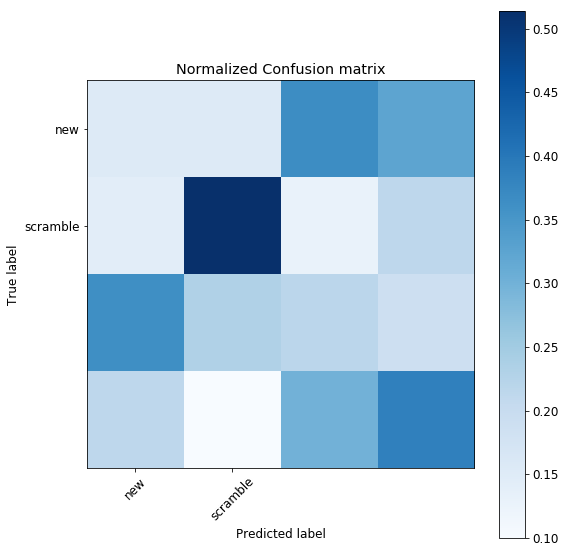

In [186]:
# Normalized confusion matrix
cm = confusion_matrix(labels, preds)
cm_normalized = cm.astype(float) / cm.sum(axis=1)[:, np.newaxis]

# Plot confusion matrix
plt.imshow(cm_normalized, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Normalized Confusion matrix')
plt.colorbar()
tick_marks = np.arange(len(target_names))
plt.xticks(tick_marks, target_names, rotation=45)
plt.yticks(tick_marks, target_names)
tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

             precision    recall  f1-score   support

     before       0.59      0.58      0.58        69
      after       0.59      0.60      0.60        70

avg / total       0.59      0.59      0.59       139



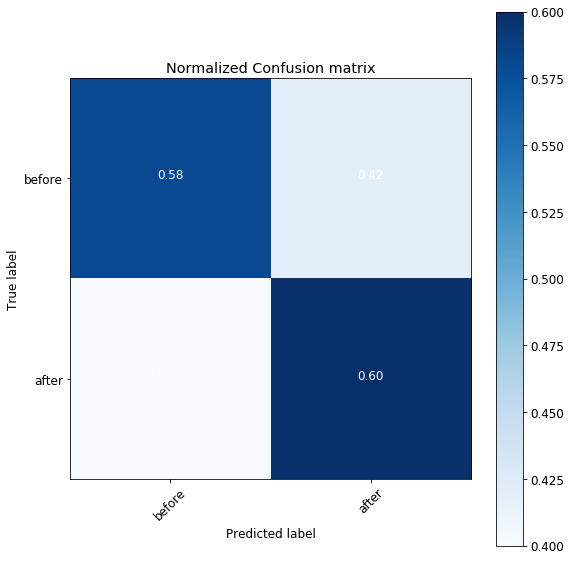

In [202]:
#extract only events with id 10 or 20 (before or after)
epochs_binary = epoch1[(epoch1.events[:,-1] == 10) | (epoch1.events[:,-1] == 20)]

clf = make_pipeline(Xdawn(n_components = 3),
                    Vectorizer(),
                    MinMaxScaler(),
                    LDA())
#cross validator
cv = StratifiedKFold(n_splits = 10, shuffle = True, random_state = 42)


#Do cross-validation
labels_binary = epochs_binary.events[:,-1]
preds_binary = np.empty(len(labels_binary))
for train, test in cv.split(epochs_binary, labels_binary):
    clf.fit(epochs_binary[train], labels_binary[train])
    preds_binary[test] = clf.predict(epochs_binary[test])
    
target_names = ['before', 'after']
report = classification_report(labels_binary, preds_binary, target_names=target_names)
print(report)

# Normalized confusion matrix
cm = confusion_matrix(labels_binary, preds_binary)
cm_normalized = cm.astype(float) / cm.sum(axis=1)[:, np.newaxis]

# Plot confusion matrix
plt.imshow(cm_normalized, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Normalized Confusion matrix')
plt.colorbar()
tick_marks = np.arange(len(target_names))
plt.xticks(tick_marks, target_names, rotation=45)
plt.yticks(tick_marks, target_names)
thresh = cm_normalized.max() / 2
fmt = '.2f'
for i, j in itertools.product(range(cm_normalized.shape[0]), range(cm_normalized.shape[1])):
        plt.text(j, i, format(cm_normalized[i, j],fmt),
                 horizontalalignment="center",
                 color="white" if cm_normalized[i, j] > thresh else "black")
tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()